# STAT 201 Project Proposal Group 20



Group members:
<br>Alan Zhang 
<br>Sneh Agarwal
<br>Taniya Cai
<br>Waxin Luo

### Introduction

Recently, bike-sharing systems have increasing popularity as a means of efficient transportation in urban areas. Its users are able to rent a bicycle from a convenient depot location, and return it at another one close to the user's destination. The ubiquity of such programs has therefore generated investigation and analysis of quantifiable data for further effectiveness. Capital Bikeshare is one such bike-sharing system, that serves the Washington D.C. metropolitan area, and publishes yearly anonymized statistics, including the daily usage times (Capital Bikeshare).

One particular parameter of interest is the normalized frequency of users during different temperatures and days for bike-sharing systems. This would gauge demand, and so would be useful for possible seasonal or monthly availability decisions. The scale parameter of interest is standard deviation as it is representative of the degree of fluctuation in bike availability of the system (Institute for Operations Research and the Management Sciences, 2020).

### Preliminary Results

In [21]:
library(repr)
library(tidyverse)
library(dplyr)
library(grid)

The first step is to download the dataset zip file from the website, unzip the files, and load the dataset into R. We name the dataset as bike.

In [22]:
dir.create("data")
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
download.file(url,"data/Bike-Sharing-Dataset.zip")
unzip("data/Bike-Sharing-Dataset.zip", files="day.csv", exdir="data/")
bike <- read_csv("data/day.csv") 
head(bike)
print("Table 1")

Warning message in dir.create("data"):
“'data' already exists”
Rows: 731 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): instant, season, yr, mnth, holiday, weekday, workingday, weathers...
date  (1): dteday


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


[1] "Table 1"


Table 1 features part of the original dataset. Since season is a appropriate generalization of factors such as temperature, it is a feasible choice to use to determine our preliminary results. 

In [23]:
bike <- bike %>%
 select(season, cnt)
print("Table 2")
head(bike)

[1] "Table 2"


season,cnt
<dbl>,<dbl>
1,985
1,801
1,1349
1,1562
1,1600
1,1606


Season is represented incorrectly as a numerical variable in table 2 so we changed it to a categorical variable. 

In [24]:
bike$season <- as.factor(bike$season)

Although we have specified to use mean and standard deviation as parameters of interest, we think that it is more visually effective to use side-by-side boxplots to compare distributions among categorical variables.

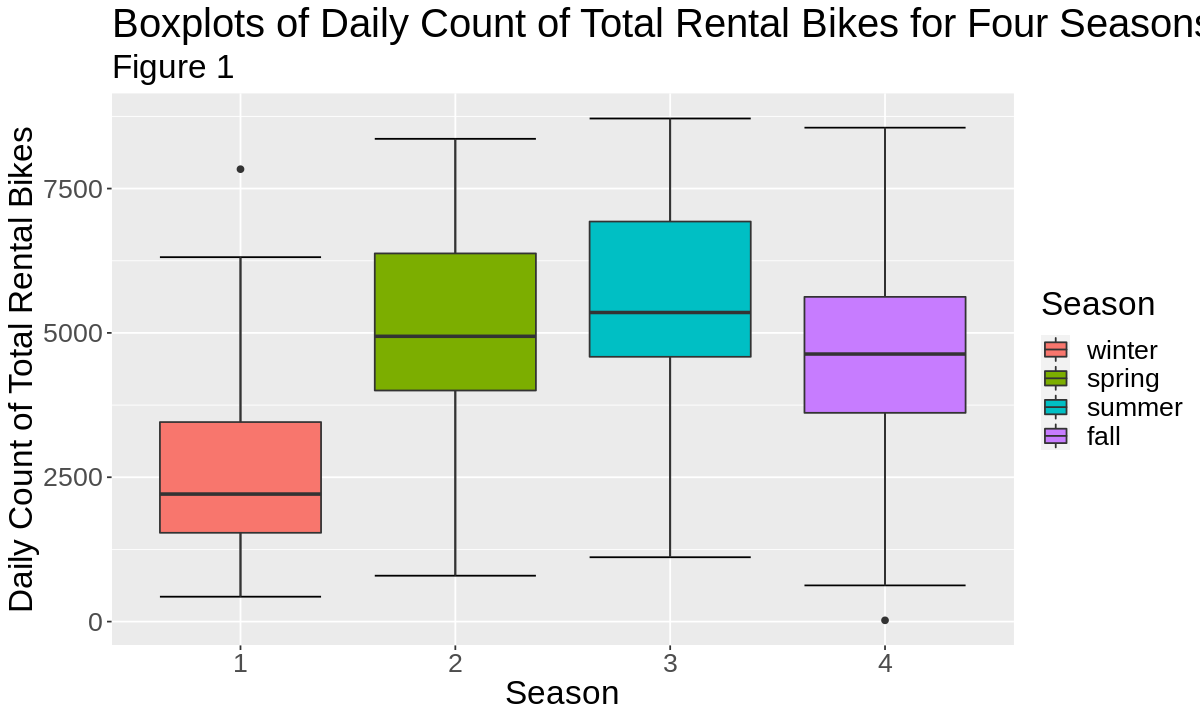

In [25]:
boxplots <- bike %>%  
          ggplot(aes(x = season, y = cnt, fill = season)) + 
          stat_boxplot(geom ='errorbar') + 
          geom_boxplot() + 
          labs(x = "Season", y = "Daily Count of Total Rental Bikes", 
               title = "Boxplots of Daily Count of Total Rental Bikes for Four Seasons",
               subtitle = "Figure 1") +
          theme(text = element_text(size=20)) +
          scale_fill_discrete(name = "Season", labels = c("winter", "spring", "summer", "fall"))
options(repr.plot.height = 6, repr.plot.width = 10)
boxplots

In [26]:
bike_summary <- bike %>% 
     group_by(season) %>% 
     summarize(n = n(), Average_Count = mean(cnt), Median_Count = median(cnt), Standard_Dev = sd(cnt),
               IQR = quantile(cnt, 0.75) - quantile(cnt, 0.25), min = min(cnt), max = max(cnt))
print("Table 4")
bike_summary

[1] "Table 4"


season,n,Average_Count,Median_Count,Standard_Dev,IQR,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,181,2604.133,2209.0,1399.942,1918.00,431,7836
2,184,4992.332,4941.5,1695.977,2374.00,795,8362
3,188,5644.303,5353.5,1459.800,2342.75,1115,8714
4,178,4728.163,4634.5,1699.615,2009.00,22,8555


Table 4 provides an exhaustive list of summary statistics of the daily cont for four seasons. We included our parameters of interest as well as other statistics that maybe helpful in better understanding the preliminary results.

### Methods: Plan

The report on the "bike" dataset is clean and wrangled which makes it easy to understand. Preliminary analysis on that data is conducted for parameters of interest that gives in-depth information about the data collected.

The dataset only includes bike-sharing data from the metro area of Washington DC. We will treat this data as a sample and use it to compare the two parameters of interest during different temperature ranges around the world. We will use bootstrapping to perform our analysis and display the change in the bootstrapping distribution as the sample size increases using asymptotic analysis.

We will investigate specific factors like temperature and use histograms, gradually increasing the sample size taken, to display the asymptotic affect on the parameters of interest, i.e. 'Average Count' at different temperatures. For hypothesis testing , we will use 'average count' as our parameter. We aim to estimate using a 95% confidence interval.

**What do you expect to find?**
- The normalized frequency of bike rentals as a consequence of date and time, to be applicable to the greater United States and the world.

**What impact could such findings have?**
- Increase in availability of bikes at temperatures when demand of bikes rented is high.
- Determining the traffic level given temperatures during a day.
- Initiating bike-sharing system in countries where its beneficial given year-round temperature ranges.

**What future questions could this lead to?**
- Does the same season have the same affect to the number of bikes rented during a day across the United States?
- How can we maximize the number of bikes rented during a day?

### References

Capital Bikeshare. (n.d.). The History of Capital Bikeshare. Capital Bikeshare. Retrieved March 5,
2022, from
https://ride.capitalbikeshare.com/about 
<br>Institute for Operations Research and the Management Sciences. (2020, January 6). Maximizing bike-share ridership: New research says it's all about location: 10% increase in bike-availability levels increases ridership by 12%. ScienceDaily. Retrieved March 4, 2022 from www.sciencedaily.com/releases/2020/01/200106141616.htm